In [1]:
# Import relevant packages
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_clean.csv')

In [3]:
# View dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# View dataframe for accuracy
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
# Looks like there are no obvious outliers, and no values missing.

In [6]:
df.shape

(10000, 50)

In [7]:
# Let's drop columns we aren't going to use (because they don't hold data we can use).
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID'], axis = 1, inplace=True)

In [8]:
# I don't want to include other columns for various reasons. State, City, County, and Zip are categorical, and the latter three have hundreds or thousands of different categories. This will overcomplicate the model and dataset, and are also somewhat redunant since we are using Latitude and Longitude. Furthermore, there is likely to be multicollinearity with these variables since they are all related to location.
print(df['County'].nunique())
print(df['City'].nunique())
print(df['Zip'].nunique())
df.drop(['County', 'City', 'Zip', 'State'], axis = 1, inplace=True)

1607
6072
8612


In [9]:
# Job and timezone are other categorical variables with too many categories and/or likely no useful (to the model) information.
df.drop(['Job', 'TimeZone'], axis = 1, inplace=True)

In [10]:
# I also want to drop the TotalCharge column - it is a function of whether or not a person is readmitted, not the other way around.
df.drop(['TotalCharge'], axis = 1, inplace=True)

In [11]:
# Rename the last 8 columns (Items 1-8)
df.rename(columns = {'Item1': 'Timely_admission', 'Item2': 'Timely_treatment', 'Item3': 'Timely_visits', 'Item4': 'Reliability',
                     'Item5': 'Options', 'Item6': 'Hours_of_treatment', 'Item7': 'Courteous_staff', 'Item8': 'Active_listening'}, inplace=True)




In [12]:
# Group continuous variables to avoid overfitting
# Lat, Lng, Population, Age, Income, VitD_levels, Initial_days, Additional_charges

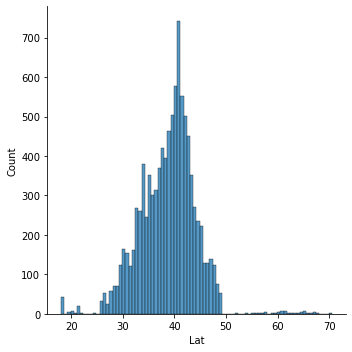

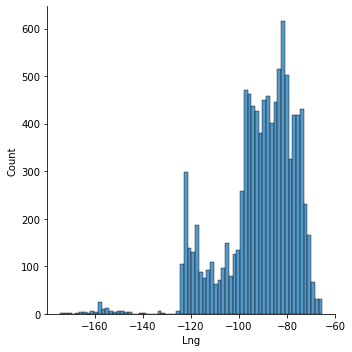

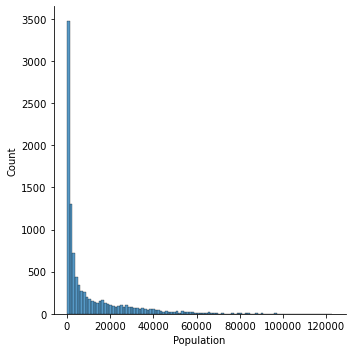

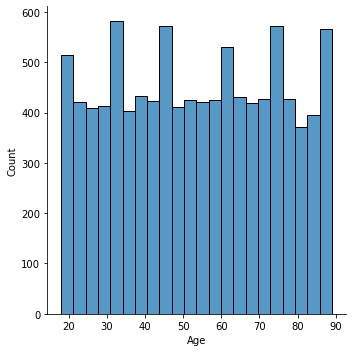

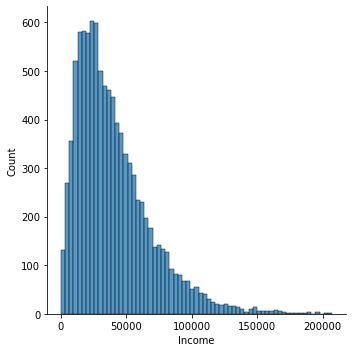

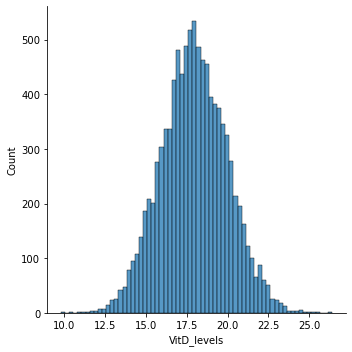

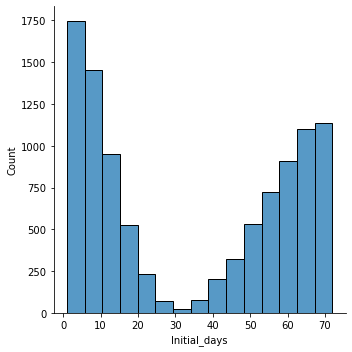

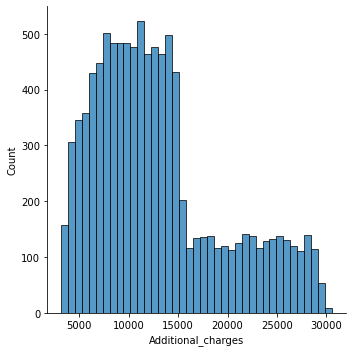

In [13]:
sb.displot(df, x="Lat")
sb.displot(df, x="Lng")
sb.displot(df, x="Population")
sb.displot(df, x="Age")
sb.displot(df, x="Income")
sb.displot(df, x="VitD_levels")
sb.displot(df, x="Initial_days")
sb.displot(df, x="Additional_charges");

In [14]:
df['Lat'] = pd.qcut(df['Lat'], q=4)
df['Lng'] = pd.qcut(df['Lng'], q=4)
df['Population'] = pd.qcut(df['Population'], q=4)
df['Age'] = pd.qcut(df['Age'], q=4)
df['Income'] = pd.qcut(df['Income'], q=4)
df['VitD_levels'] = pd.qcut(df['VitD_levels'], q=4)
df['Initial_days'] = pd.qcut(df['Initial_days'], q=4)
df['Additional_charges'] = pd.qcut(df['Additional_charges'], q=4)

In [15]:
# Create dummies for categorical variables
df_cats = df[['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain', 'ReAdmis', 'Lat', 'Lng', 'Population', 
        'Age', 'Income', 'VitD_levels', 'Initial_days', 'Additional_charges']]
df_dummies = pd.get_dummies(data=df_cats, drop_first=True)
df_new = df.join(df_dummies)

In [16]:
# Drop old categorical columns
df_new.drop(['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain', 'ReAdmis', 'Lat', 'Lng', 'Population', 
        'Age', 'Income', 'VitD_levels', 'Initial_days', 'Additional_charges'], axis = 1, inplace=True)

In [17]:
# Rename columns
df_new.columns = df_new.columns.str.replace(' ', '_')
df_new.columns = df_new.columns.str.replace('(', '')
df_new.columns = df_new.columns.str.replace(']', '')
df_new.columns = df_new.columns.str.replace(',', '')
df_new.columns = df_new.columns.str.replace('.', '')

In [18]:
df_new.head()

,Children,Doc_visits,Full_meals_eaten,vitD_supp,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatment,Courteous_staff,Active_listening,Area_Suburban,Area_Urban,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Soft_drink_Yes,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT_Scan,Services_Intravenous,Services_MRI,Complication_risk_Low,Complication_risk_Medium,BackPain_Yes,ReAdmis_Yes,Lat_35255_39419,Lat_39419_42044,Lat_42044_70561,Lng_-97353_-88397,Lng_-88397_-80438,Lng_-80438_-6529,Population_69475_27690,Population_27690_139450,Population_139450_1228140,Age_360_530,Age_530_710,Age_710_890,Income_19598775_3376842,Income_3376842_54296402,Income_54296402_2072491,VitD_levels_16626_17951,VitD_levels_17951_19348,VitD_levels_19348_26394,Initial_days_7896_35836,Initial_days_35836_61161,Initial_days_61161_71981,Additional_charges_7986488_11573978,Additional_charges_11573978_1562649,Additional_charges_1562649_3056607
0,1,6,0,0,3,3,2,2,4,3,3,4,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1
1,3,4,2,1,3,4,3,4,4,4,3,3,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,3,4,1,0,2,4,4,4,3,4,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,4,1,0,3,5,5,3,4,5,5,5,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,1,5,0,2,2,1,3,3,5,3,4,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
# Define X and y variables
X = df_new[['Children', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Timely_admission',
'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 
'Courteous_staff', 'Active_listening', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 
'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 
'Soft_drink_Yes', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 
'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 
'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT_Scan', 
'Services_Intravenous', 'Services_MRI', 'Complication_risk_Low', 'Complication_risk_Medium', 'BackPain_Yes', 
'Lat_35255_39419', 'Lat_39419_42044', 'Lat_42044_70561', 'Lng_-97353_-88397', 'Lng_-88397_-80438', 
'Lng_-80438_-6529', 'Population_69475_27690', 'Population_27690_139450', 'Population_139450_1228140', 
'Age_360_530', 'Age_530_710', 'Age_710_890', 'Income_19598775_3376842', 'Income_3376842_54296402',
'Income_54296402_2072491', 'VitD_levels_16626_17951', 'VitD_levels_17951_19348', 'VitD_levels_19348_26394',
'Initial_days_7896_35836', 'Initial_days_35836_61161', 'Initial_days_61161_71981', 'Additional_charges_7986488_11573978', 
'Additional_charges_11573978_1562649', 'Additional_charges_1562649_3056607']]
            
y = df_new['ReAdmis_Yes']

In [20]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
y_pred[0:15]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1146  120]
 [ 124  610]]


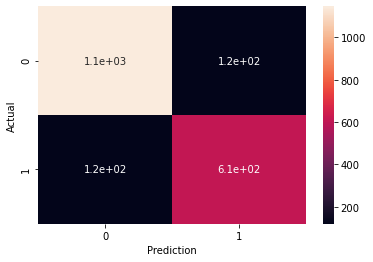

In [24]:
# Confusion matrix in a heat map
graph = sb.heatmap(cf_matrix, annot=True)
graph.set(xlabel="Prediction", ylabel = "Actual");

In [25]:
# Accuracy score (correct/all)
accuracy_score(y_test, y_pred)

0.878

In [26]:
# Precision score (true positives / true positives + false positives)
precision_score(y_test, y_pred)

0.8356164383561644

In [27]:
# Recall score (true positives / true positives + false negatives)
recall_score(y_test, y_pred)

0.8310626702997275

In [28]:
mean_squared_error(y_test,y_pred)

0.122